<a href="https://colab.research.google.com/github/vggls/xai_and_evaluation_metrics/blob/main/example_xrays/Attribution_Maps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Imports**

In [ ]:
pip install grad-cam

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import random

import torch
from torchvision  import datasets, transforms

from pytorch_grad_cam import GradCAM, HiResCAM

In [ ]:
# custom written code 
from xrays import create_datasets
from plot_tensor import convert_for_plot

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**2. Download from Kaggle**

In [ ]:
! mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! kaggle datasets download tawsifurrahman/covid19-radiography-database

100% 777M/778M [00:34<00:00, 25.7MB/s]
100% 778M/778M [00:34<00:00, 23.8MB/s]


In [ ]:
! unzip covid19-radiography-database.zip

**3. Test dataset** (Don't need training and validation data for this notebook.)

In [ ]:
# to be applied to training data
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),          #recommended size for DenseNet, GoogLeNet and EfficientNet
    transforms.RandomHorizontalFlip(),      #data augmentation
    transforms.RandomVerticalFlip(),        #data augmentation
    transforms.RandomRotation(degrees=20),  #data augmentation
    transforms.ToTensor(),
    transforms.Normalize(torch.Tensor([0.5, 0.5, 0.5]), torch.Tensor([0.5, 0.5, 0.5]))
])
# to be applied to validation and test data
test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(torch.Tensor([0.5, 0.5, 0.5]), torch.Tensor([0.5, 0.5, 0.5]))
])

In [ ]:
train_dataset, validation_dataset, test_dataset = create_datasets(train_transforms, test_transforms)

**4. Attribution Maps**

In [ ]:
drive_path = './drive/MyDrive/Colab_Notebooks/dataset_models/Covid-19_Radiography_Dataset/Models/'
resnet34 = torch.load(drive_path + 'xrays_resnet34.pt')

In [ ]:
resnet34 = resnet34.cuda()
resnet34 = resnet34.eval()

In [ ]:
gradcam_instance = GradCAM(model=resnet34, target_layers=[resnet34.layer4[2].conv2], use_cuda=True)
hirescam_instance = HiResCAM(model=resnet34, target_layers=[resnet34.layer4[2].conv2], use_cuda=True)

<ipython-input-21-36e7d2368e13>:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-21-36e7d2368e13>:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 3, figsize=(12,4))


<Figure size 432x288 with 0 Axes>

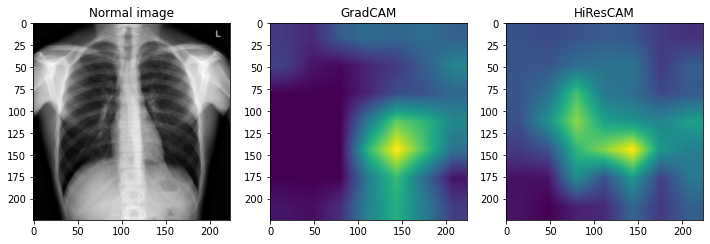

<Figure size 432x288 with 0 Axes>

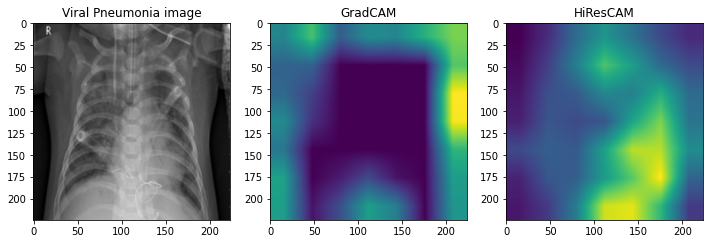

<Figure size 432x288 with 0 Axes>

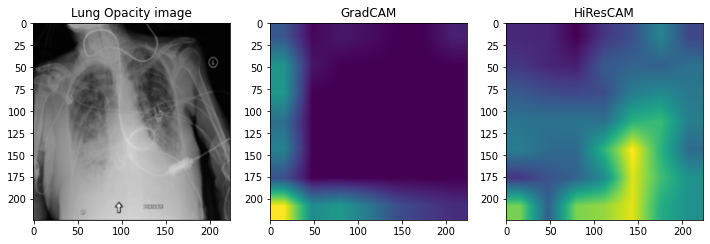

<Figure size 432x288 with 0 Axes>

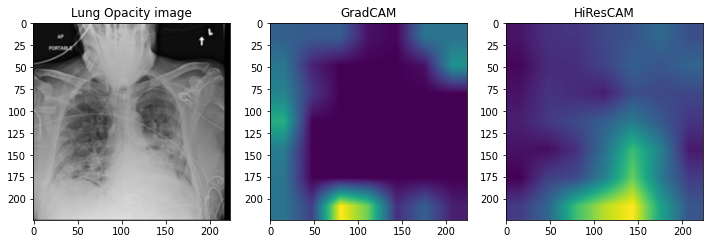

<Figure size 432x288 with 0 Axes>

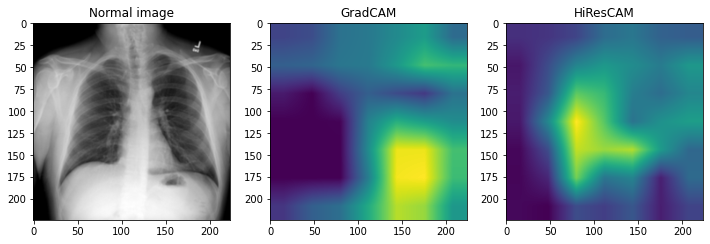

<Figure size 432x288 with 0 Axes>

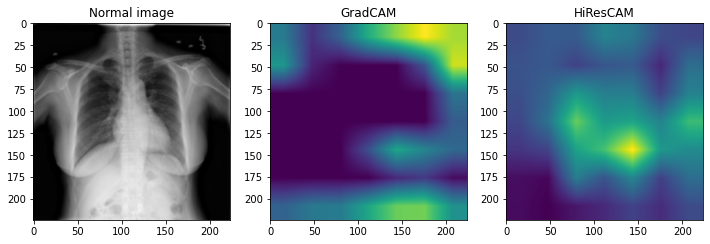

<Figure size 432x288 with 0 Axes>

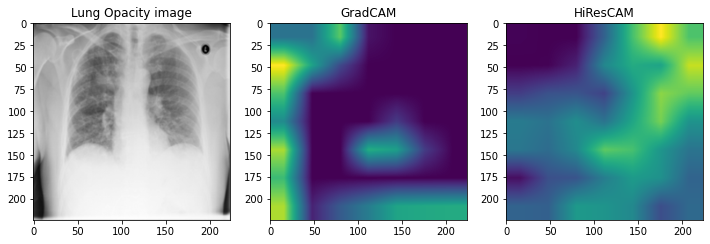

<Figure size 432x288 with 0 Axes>

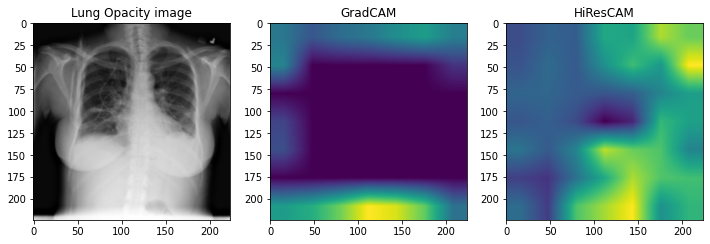

<Figure size 432x288 with 0 Axes>

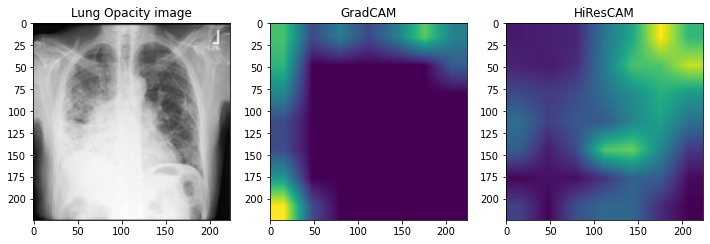

<Figure size 432x288 with 0 Axes>

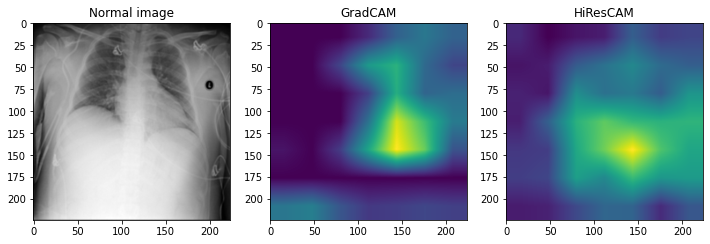

<Figure size 432x288 with 0 Axes>

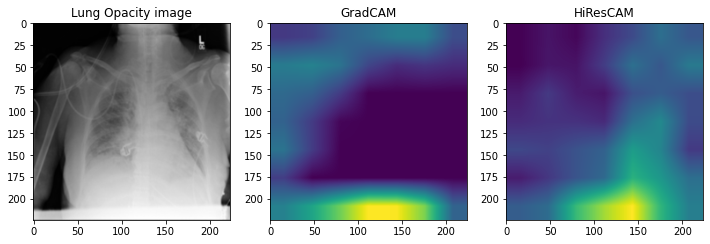

<Figure size 432x288 with 0 Axes>

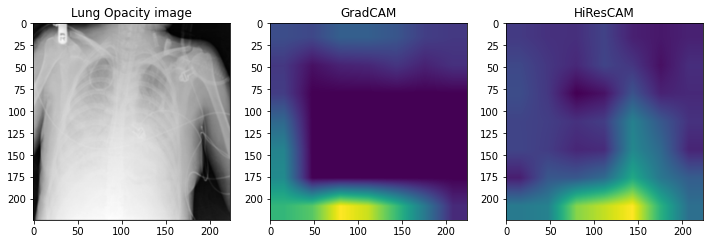

<Figure size 432x288 with 0 Axes>

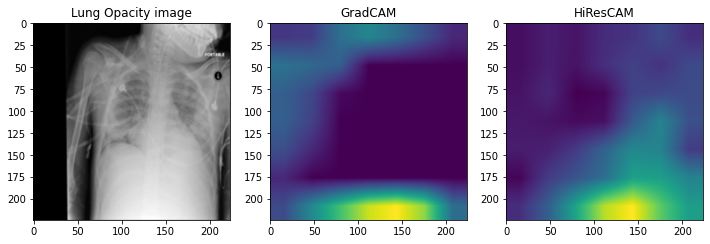

<Figure size 432x288 with 0 Axes>

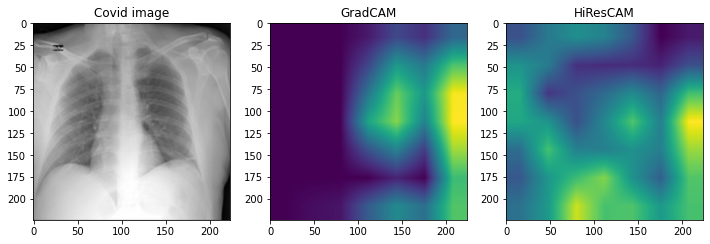

<Figure size 432x288 with 0 Axes>

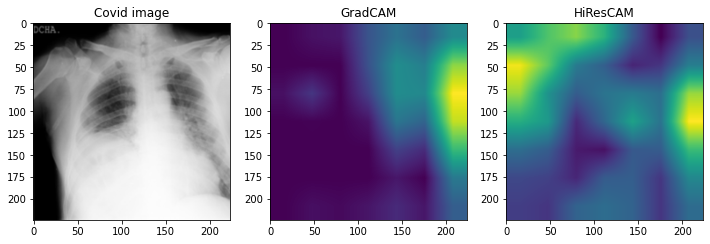

<Figure size 432x288 with 0 Axes>

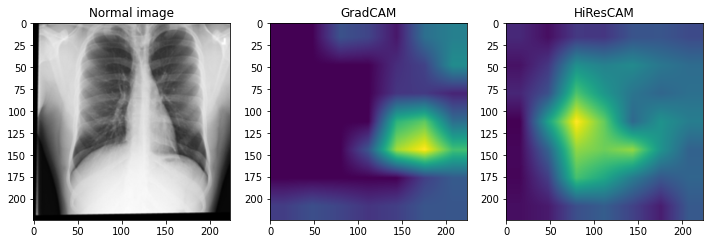

<Figure size 432x288 with 0 Axes>

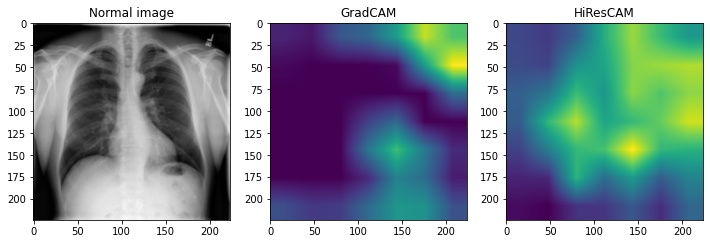

<Figure size 432x288 with 0 Axes>

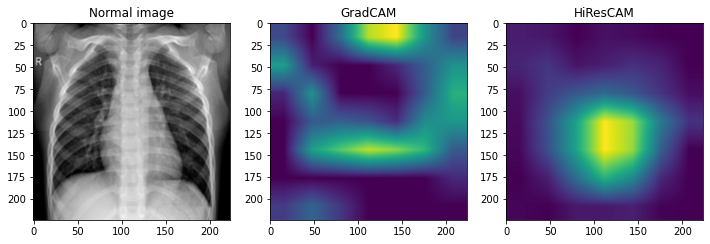

<Figure size 432x288 with 0 Axes>

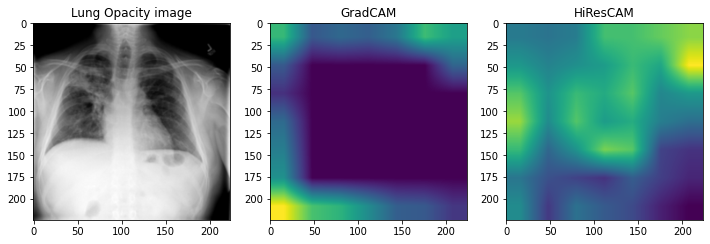

In [ ]:
i = 0

random_test_indices = random.sample(range(len(test_dataset)), 20) # 20 samples

classes = ['Covid', 'Lung Opacity', 'Normal', 'Viral Pneumonia']

for index in random_test_indices:

    image, label = test_dataset[index]
    image = image.cuda()
    
    if label==int(torch.argmax(resnet34(image.unsqueeze(0)))):
        
        i+=1
        
        clas = classes[label]
        
        gradcam_attributions = gradcam_instance(input_tensor=image.unsqueeze(0))[0,:,:]
        hirescam_attributions = hirescam_instance(input_tensor=image.unsqueeze(0))[0,:,:]
        
        plt.figure()
        fig, ax = plt.subplots(1, 3, figsize=(12,4))
        ax[0].imshow(convert_for_plot(image)); ax[0].set_title('{} image'.format(clas))
        ax[1].imshow(gradcam_attributions); ax[1].set_title('GradCAM')
        ax[2].imshow(hirescam_attributions); ax[2].set_title('HiResCAM')
        
    if i==20:
        break